In [20]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
dataset = pd.read_csv('wine.csv') #from kaggle
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [22]:
dataset.shape

(178, 14)

In [23]:
dataset.tail()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840,3
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560,3


In [40]:
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

type(X)
type(y)
print(type(np.unique(y)))
print("Classes:", np.unique(y))

<class 'numpy.ndarray'>
Classes: [1 2 3]


In [50]:
print(dataset.describe())

          Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000      

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Learn AND apply
X_test_scaled = scaler.transform(X_test) # Just Apply

In [27]:
X_full_scaled = scaler.fit_transform(X) # For visualization

In [46]:
print(f"\nBefore standardization - Feature 0 (Alcohol):")
print(f"  Mean: {X_train[:, 0].mean():.2f}, Std: {X_train[:, 0].std():.2f}")
print(f"After standardization - Feature 0 (Alcohol):")
print(f"  Mean: {X_train_scaled[:, 0].mean():.2f}, Std: {X_train_scaled[:, 0].std():.2f}")
#fomula: z = (x - mean) / standard_deviation


Before standardization - Feature 0 (Alcohol):
  Mean: 12.98, Std: 0.80
After standardization - Feature 0 (Alcohol):
  Mean: 0.00, Std: 1.00


In [47]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [32]:
print(f"\nOriginal dimensions: {X_train.shape[1]} features")
print(f"Reduced dimensions: {X_train_pca.shape[1]} principal components")
print(f"Dimensionality reduction: {((1 - X_train_pca.shape[1]/X_train.shape[1]) * 100):.1f}%")


Original dimensions: 13 features
Reduced dimensions: 2 principal components
Dimensionality reduction: 84.6%


In [33]:
print(f"\nExplained Variance by each PC:")
print(f"  PC1: {pca.explained_variance_ratio_[0]:.4f} ({pca.explained_variance_ratio_[0]*100:.2f}%)")
print(f"  PC2: {pca.explained_variance_ratio_[1]:.4f} ({pca.explained_variance_ratio_[1]*100:.2f}%)")
print(f"  Total variance captured: {sum(pca.explained_variance_ratio_):.4f} ({sum(pca.explained_variance_ratio_)*100:.2f}%)")


Explained Variance by each PC:
  PC1: 0.3688 (36.88%)
  PC2: 0.1932 (19.32%)
  Total variance captured: 0.5620 (56.20%)


In [34]:
print(f"\nInterpretation: Using only 2 components, we retain {sum(pca.explained_variance_ratio_)*100:.1f}% of information!")


Interpretation: Using only 2 components, we retain 56.2% of information!


In [13]:
pca_vis = PCA(n_components=2)
X_pca_full = pca_vis.fit_transform(X_full_scaled)   # For Visualization!

In [14]:
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train_pca, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [15]:
# Predict
y_pred = classifier.predict(X_test_pca)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9722222222222222



Confusion Matrix:
[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]

Interpretation:
  - Diagonal elements: Correct predictions
  - Off-diagonal elements: Misclassifications


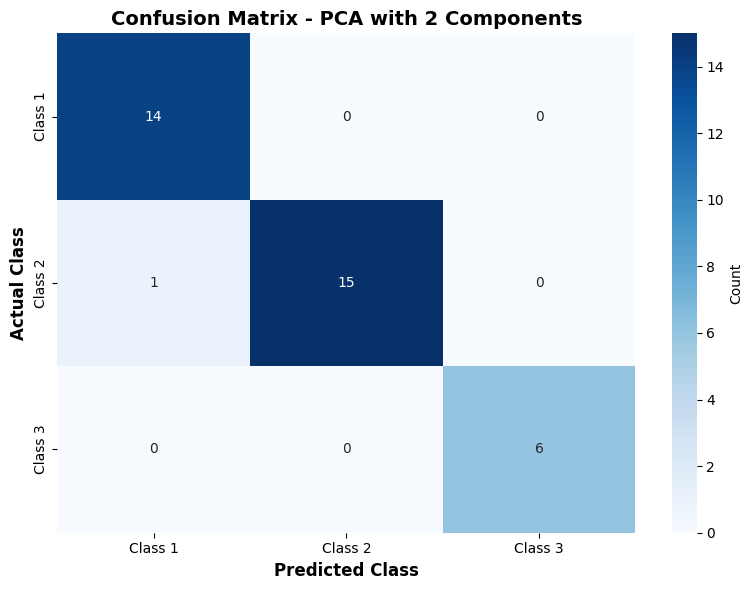

In [35]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
print("\nInterpretation:")
print("  - Diagonal elements: Correct predictions")
print("  - Off-diagonal elements: Misclassifications")

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 1', 'Class 2', 'Class 3'], 
            yticklabels=['Class 1', 'Class 2', 'Class 3'],
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted Class', fontsize=12, fontweight='bold')
plt.ylabel('Actual Class', fontsize=12, fontweight='bold')
plt.title('Confusion Matrix - PCA with 2 Components', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [17]:
"""X_scaled = scaler.fit_transform(X)
pca_vis = PCA(n_components=2)
X_pca = pca_vis.fit_transform(X_scaled)"""

'X_scaled = scaler.fit_transform(X)\npca_vis = PCA(n_components=2)\nX_pca = pca_vis.fit_transform(X_scaled)'

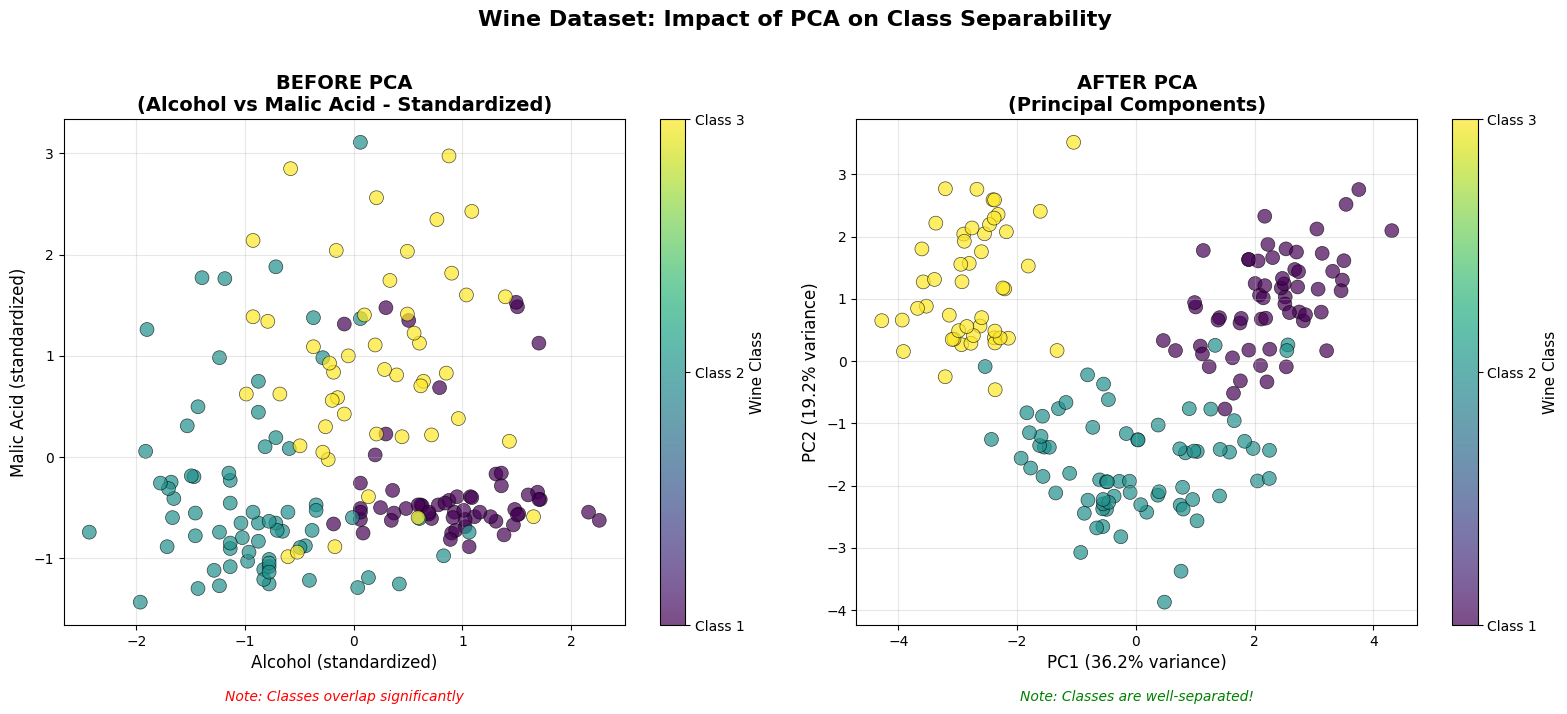

In [36]:
plt.figure(figsize=(16, 7))

# BEFORE PCA: Plot first 2 original features
plt.subplot(1, 2, 1)
scatter1 = plt.scatter(X_full_scaled[:, 0],  # Feature 0: Alcohol
                       X_full_scaled[:, 1],  # Feature 1: Malic Acid
                       c=y, cmap='viridis', edgecolor='black', 
                       s=100, alpha=0.7, linewidth=0.5)
plt.title('BEFORE PCA\n(Alcohol vs Malic Acid - Standardized)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Alcohol (standardized)', fontsize=12)
plt.ylabel('Malic Acid (standardized)', fontsize=12)
plt.grid(True, alpha=0.3)
cbar1 = plt.colorbar(scatter1, ticks=[1, 2, 3])
cbar1.set_label('Wine Class', fontsize=11)
cbar1.set_ticklabels(['Class 1', 'Class 2', 'Class 3'])

plt.text(0.5, -0.15, 'Note: Classes overlap significantly', 
         transform=plt.gca().transAxes, ha='center', 
         fontsize=10, style='italic', color='red')

# AFTER PCA: Plot principal components
plt.subplot(1, 2, 2)
scatter2 = plt.scatter(X_pca_full[:, 0],  # PC1
                       X_pca_full[:, 1],  # PC2
                       c=y, cmap='viridis', edgecolor='black', 
                       s=100, alpha=0.7, linewidth=0.5)
plt.title('AFTER PCA\n(Principal Components)', 
          fontsize=14, fontweight='bold')
plt.xlabel(f'PC1 ({pca_vis.explained_variance_ratio_[0]*100:.1f}% variance)', 
           fontsize=12)
plt.ylabel(f'PC2 ({pca_vis.explained_variance_ratio_[1]*100:.1f}% variance)', 
           fontsize=12)
plt.grid(True, alpha=0.3)
cbar2 = plt.colorbar(scatter2, ticks=[1, 2, 3])
cbar2.set_label('Wine Class', fontsize=11)
cbar2.set_ticklabels(['Class 1', 'Class 2', 'Class 3'])

plt.text(0.5, -0.15, 'Note: Classes are well-separated!', 
         transform=plt.gca().transAxes, ha='center', 
         fontsize=10, style='italic', color='green')

plt.suptitle('Wine Dataset: Impact of PCA on Class Separability', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

Total possible components: 13

Variance explained by each component:
  PC1: 0.3688 (36.88%)
  PC2: 0.1932 (19.32%)
  PC3: 0.1075 (10.75%)
  PC4: 0.0742 (7.42%)
  PC5: 0.0625 (6.25%)
  PC6: 0.0491 (4.91%)
  PC7: 0.0412 (4.12%)
  PC8: 0.0250 (2.50%)
  PC9: 0.0231 (2.31%)
  PC10: 0.0186 (1.86%)
  PC11: 0.0173 (1.73%)
  PC12: 0.0125 (1.25%)
  PC13: 0.0070 (0.70%)

Cumulative variance explained:
  First 1 components: 0.3688 (36.88%)
  First 2 components: 0.5620 (56.20%)
  First 3 components: 0.6696 (66.96%)
  First 4 components: 0.7438 (74.38%)
  First 5 components: 0.8062 (80.62%)
  First 6 components: 0.8553 (85.53%)
  First 7 components: 0.8965 (89.65%)
  First 8 components: 0.9215 (92.15%)
  First 9 components: 0.9445 (94.45%)
  First 10 components: 0.9632 (96.32%)
  First 11 components: 0.9805 (98.05%)
  First 12 components: 0.9930 (99.30%)
  First 13 components: 1.0000 (100.00%)

👉 Components needed for 95% variance: 10
   Dimensionality reduction: 13 → 10 features


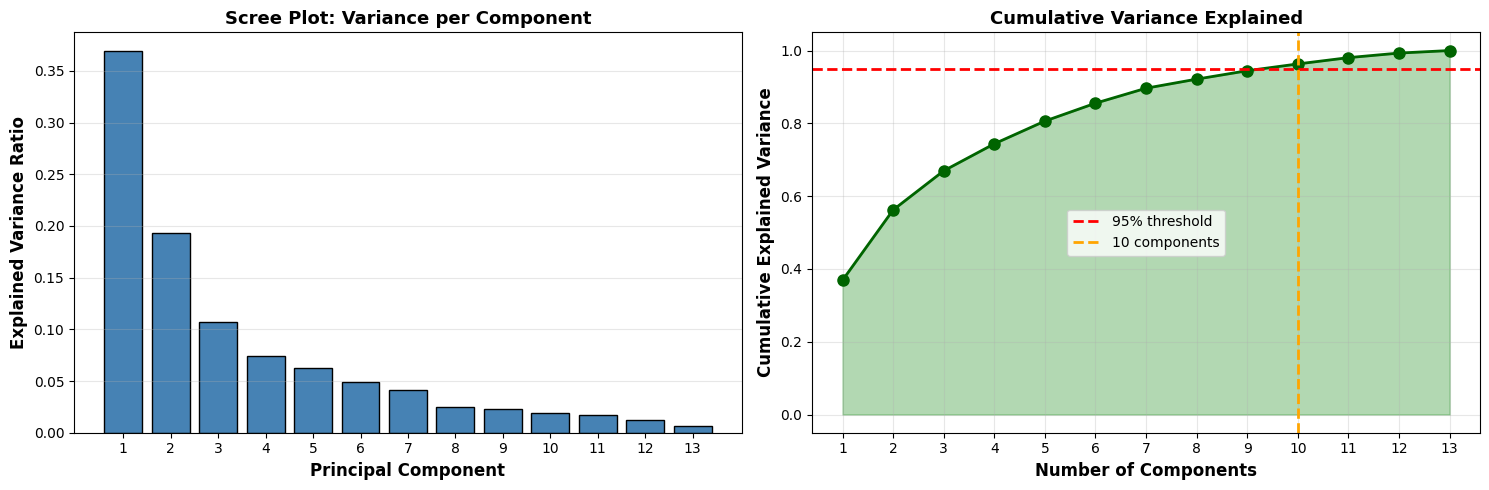

In [37]:
pca_full = PCA()
pca_full.fit(X_train_scaled)

print(f"Total possible components: {len(pca_full.explained_variance_ratio_)}")
print("\nVariance explained by each component:")
for i, var in enumerate(pca_full.explained_variance_ratio_, 1):
    print(f"  PC{i}: {var:.4f} ({var*100:.2f}%)")

# Cumulative variance
cumsum = np.cumsum(pca_full.explained_variance_ratio_)
print("\nCumulative variance explained:")
for i, cum_var in enumerate(cumsum, 1):
    print(f"  First {i} components: {cum_var:.4f} ({cum_var*100:.2f}%)")

# Find components for 95% variance
n_components_95 = np.argmax(cumsum >= 0.95) + 1
print(f"\n👉 Components needed for 95% variance: {n_components_95}")
print(f"   Dimensionality reduction: {13} → {n_components_95} features")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Scree plot
axes[0].bar(range(1, len(pca_full.explained_variance_ratio_) + 1), 
            pca_full.explained_variance_ratio_, 
            color='steelblue', edgecolor='black')
axes[0].set_xlabel('Principal Component', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Explained Variance Ratio', fontsize=12, fontweight='bold')
axes[0].set_title('Scree Plot: Variance per Component', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].set_xticks(range(1, 14))

# Cumulative variance plot
axes[1].plot(range(1, len(cumsum) + 1), cumsum, 
             marker='o', linewidth=2, markersize=8, color='darkgreen')
axes[1].axhline(y=0.95, color='red', linestyle='--', 
                linewidth=2, label='95% threshold')
axes[1].axvline(x=n_components_95, color='orange', linestyle='--', 
                linewidth=2, label=f'{n_components_95} components')
axes[1].fill_between(range(1, len(cumsum) + 1), cumsum, alpha=0.3, color='green')
axes[1].set_xlabel('Number of Components', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Cumulative Explained Variance', fontsize=12, fontweight='bold')
axes[1].set_title('Cumulative Variance Explained', fontsize=13, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(range(1, 14))

plt.tight_layout()
plt.show()